In [20]:
import csv
import matplotlib.pyplot as plt

In [21]:
# Replace 'file.csv' with your CSV file's path
file_path = '../data/airQualityData.csv'

# Open the CSV file using a context manager
lat = []
long = []
time = []
noise = []

In [22]:
def calculate_air_quality(co, no2, o3, pm10, pm25):
    normalized_co = float(co) / 50.0
    normalized_no2 = float(no2) / 100.0 
    normalized_o3 = float(o3) / 200.0
    normalized_pm10 = float(pm10) / 50.0
    normalized_pm25 = float(pm25) / 25.0
    overall_iqa = (normalized_co + normalized_no2 + normalized_o3 + normalized_pm10 + normalized_pm25) / 5.0
    return overall_iqa 

In [23]:
unique_arrays = {}
new_string_values = []
with open(file_path, 'r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    next(csv_reader)
    # Iterate through each row in the CSV file
    for row in csv_reader:
        #print(row)
        
        string_value = row[1] if len(row[1]) > 0 else None
        time = row[1].split(' ')
        if time[1]:
            if time[1] not in unique_arrays:
                unique_arrays[time[1]] = []
                # Create an empty array for the new unique value
            if (len(row[2]) > 0):
                airqual = float(row[2])
                new_string_values.append(time[1])
                # Append the occurrence to the array corresponding to the value
                unique_arrays[time[1]].append(airqual)
        

In [24]:
#print(len(new_string_values), new_string_values)
print(sum(unique_arrays[new_string_values[4]]) / len(unique_arrays[new_string_values[4]]))
pos_location = [[41.1484,-8.59837], [41.1484,-8.59837], [41.1719,-8.61319], [41.1652,-8.67215], [41.1625,-8.59070]]


305.2156774071981


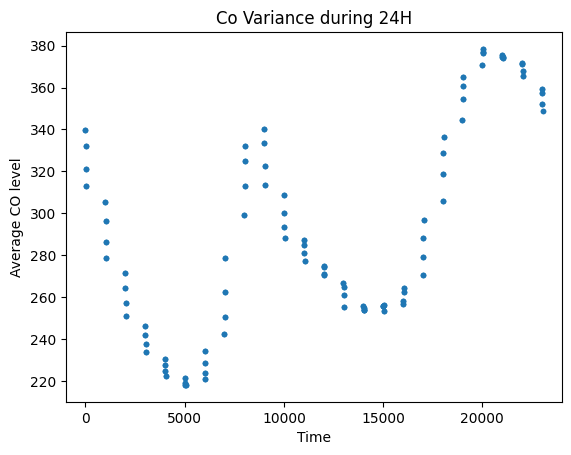

In [25]:
# create graph with co variance average for each hour
average = []
average2 = []
time = []
timer = []
counter = 0
for i in range(len(unique_arrays) - 1):
    average.append(sum(unique_arrays[new_string_values[i]]) / len(unique_arrays[new_string_values[i]]))
    hour_minute_second = new_string_values[i].split(':')
    hour = int(hour_minute_second[0])
    minute = int(hour_minute_second[1])
    '''time.append(hour * 60 + minute)
    if i % 4 == 0 and i > 4:
        timer.append(counter) 
        average2.append((average[i- 1] + average[i - 2] + average[i - 3] + average[i - 4]) / 4)
        print(timer[counter], average2[counter])
        counter += 1'''
    time.append(hour * 1000 + minute)
    #print(new_string_values[i], sum(unique_arrays[new_string_values[i]]) / len(unique_arrays[new_string_values[i]]))
    i += 1
plt.plot(time,average, '.')
plt.ylabel('Average CO level')
plt.xlabel('Time')
plt.title('Co Variance during 24H')
plt.xlim(-1000, 24000)
plt.show()

In [52]:
#create a new csv file with the average values and timestamp
import pandas as pd

jump = 4
result_data = []

for i in range(0, 95, jump):
    timestamp = new_string_values[i]
    avg_value = average[i]
    result_data.append((timestamp, avg_value))

# Create a DataFrame
result_df = pd.DataFrame(result_data, columns=['Timestamp', 'AverageValue'])

# Save the DataFrame to a CSV file
result_df.to_csv('averageByHour.csv', index=False)

print("Result file 'values.csv' created.")


Result file 'values.csv' created.


In [2]:
# create a map with the coordinates of the road constrains and the air quality data
import folium
import pandas as pd
import random

# Read the CSV file
df = pd.read_csv('roadConstrains.csv')

# Convert latitude and longitude to numeric values
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Drop rows with missing latitude or longitude values
df = df.dropna(subset=['latitude', 'longitude'])

# Check if there are still rows in the DataFrame
if not df.empty:
    # Create a folium map centered at the mean of the coordinates
    map_center = [df['latitude'].mean(), df['longitude'].mean()]
    mymap = folium.Map(location=map_center, zoom_start=13.2)

    # Add markers for each event in the DataFrame with random colors
    for index, row in df.iterrows():
        # Generate a random color (orange, green, or red)
        color = random.choice(['orange', 'green', 'red'])

        # Create an Icon with the specified color
        icon = folium.Icon(color=color)

        # Add marker to the map using the Icon
        folium.Marker(location=[row['latitude'], row['longitude']], popup=row['subCategory'], icon=icon).add_to(mymap)

    # Save the map as an HTML file
    mymap.save('map.html')
    print("Result file 'map.html' created.")
    
else:
    print("No valid coordinates found in the CSV.")

Result file 'map.html' created.
